#### Importing Necessary Package

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#import warning
import warnings
warnings.filterwarnings('ignore')

#### Importing datasets (from kaggle)

In [3]:
train = pd.read_csv('./Dataset/tabular-playground-series-mar-2022/train.csv')
test = pd.read_csv('./Dataset/tabular-playground-series-mar-2022/test.csv')
sample_sub = pd.read_csv('./Dataset/tabular-playground-series-mar-2022/sample_submission.csv')

#### Checking datasets

In [4]:
train.head()

,row_id,time,x,y,direction,congestion
0,0,1991-04-01 00:00:00,0,0,EB,70
1,1,1991-04-01 00:00:00,0,0,NB,49
2,2,1991-04-01 00:00:00,0,0,SB,24
3,3,1991-04-01 00:00:00,0,1,EB,18
4,4,1991-04-01 00:00:00,0,1,NB,60


In [5]:
test.head()

,row_id,time,x,y,direction
0,848835,1991-09-30 12:00:00,0,0,EB
1,848836,1991-09-30 12:00:00,0,0,NB
2,848837,1991-09-30 12:00:00,0,0,SB
3,848838,1991-09-30 12:00:00,0,1,EB
4,848839,1991-09-30 12:00:00,0,1,NB


In [6]:
sample_sub.head()

,row_id,congestion
0,848835,0.0
1,848836,0.0
2,848837,0.0
3,848838,0.0
4,848839,0.0


In [7]:
#dataset columns types
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   row_id     2340 non-null   int64 
 1   time       2340 non-null   object
 2   x          2340 non-null   int64 
 3   y          2340 non-null   int64 
 4   direction  2340 non-null   object
dtypes: int64(3), object(2)
memory usage: 91.5+ KB
None


In [8]:
#checking unique values from direction columns
print(train['direction'].unique())
print(test['direction'].unique())

#checking sum of every direction
print(train['direction'].value_counts())
print("--------------------------------")
print(test['direction'].value_counts())

['EB' 'NB' 'SB' 'WB' 'NE' 'SW' 'NW' 'SE']
['EB' 'NB' 'SB' 'WB' 'NE' 'SW' 'NW' 'SE']
SB    156708
NB    156708
EB    156708
WB    143649
NE     91413
SW     91413
SE     26118
NW     26118
Name: direction, dtype: int64
--------------------------------
NB    432
SB    432
EB    432
WB    396
NE    252
SW    252
SE     72
NW     72
Name: direction, dtype: int64


In [9]:
#checking x and y columns unique values
print("x column")
print(train['x'].unique())
print("------------------")
print("y column")
print(train['y'].unique())

x column
[0 1 2]
------------------
y column
[0 1 2 3]


#### Data Cleaning and manipulation

In [10]:
#checking missing values
print('train datasets')
print(train.isnull().sum())
print("-------------------")
print('test datasets')
print(test.isnull().sum())

train datasets
row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64
-------------------
test datasets
row_id       0
time         0
x            0
y            0
direction    0
dtype: int64


In [11]:
#checking duplicated values
print('train datasets')
print(train.duplicated().any())
print("----------------------")
print('test datasets')
print(test.duplicated().any())

train datasets
False
----------------------
test datasets
False


In [12]:
#deleting unecessaries column
train = train.drop(columns=['row_id'], axis=1)
test = test.drop(columns=['row_id'], axis=1)

train.head()

,time,x,y,direction,congestion
0,1991-04-01 00:00:00,0,0,EB,70
1,1991-04-01 00:00:00,0,0,NB,49
2,1991-04-01 00:00:00,0,0,SB,24
3,1991-04-01 00:00:00,0,1,EB,18
4,1991-04-01 00:00:00,0,1,NB,60


#### Feature Engineering

In [13]:
def feature_engineering(df):
    
    #changing time column type to datetime
    df['time'] = pd.to_datetime(df['time'])
    
    #getting hour, day, and dayofweek from time columns
    df['hour'] = df['time'].dt.hour
    df['day'] = df['time'].dt.day
    df['dayofweek'] = df['time'].dt.dayofweek
    
    #make columns that shows that time is weekend, midnight and evening
    df['weekend'] = (df['time'].dt.dayofweek > 4).astype('int')
    #midnight condition
    df['midnight'] = np.where(df['hour'] < 5, 1, 0)
    #evening condition
    df['evening'] = np.where(df['hour'] >= 17, 1, 0)
    
    #making other columns
    df['x+y'] = df['x'].astype('str') + df['y'].astype('str')
    df['x+y+direction'] = df['x'].astype('str') + df['y'].astype('str') + df['direction'].astype('str')
    df['hour+direction'] = df['hour'].astype('str') + df['direction'].astype('str')
    df['hour+x+y'] = df['hour'].astype('str') + df['x'].astype('str') + df['y'].astype('str')
    df['hour+direction+x'] = df['hour'].astype('str') + df['direction'].astype('str') + df['x'].astype('str')
    df['hour+direction+y'] = df['hour'].astype('str') + df['direction'].astype('str') + df['y'].astype('str')
    df['hour+direction+x+y'] = df['hour'].astype('str') + df['direction'].astype('str') + df['x'].astype('str') + df['y'].astype('str')
    df['hour+x'] = df['hour'].astype('str') + df['x'].astype('str')
    df['hour+y'] = df['hour'].astype('str') + df['y'].astype('str')    
    
    #dropping time column
    df = df.drop(columns = ['time'], axis = 1)
    
    return df

In [14]:
feature_engineering(train)

,x,y,direction,congestion,hour,day,dayofweek,weekend,midnight,evening,x+y,x+y+direction,hour+direction,hour+x+y,hour+direction+x,hour+direction+y,hour+direction+x+y,hour+x,hour+y
0,0,0,EB,70,0,1,0,0,1,0,00,00EB,0EB,000,0EB0,0EB0,0EB00,00,00
1,0,0,NB,49,0,1,0,0,1,0,00,00NB,0NB,000,0NB0,0NB0,0NB00,00,00
2,0,0,SB,24,0,1,0,0,1,0,00,00SB,0SB,000,0SB0,0SB0,0SB00,00,00
3,0,1,EB,18,0,1,0,0,1,0,01,01EB,0EB,001,0EB0,0EB1,0EB01,00,01
4,0,1,NB,60,0,1,0,0,1,0,01,01NB,0NB,001,0NB0,0NB1,0NB01,00,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848830,2,3,NB,54,11,30,0,0,0,0,23,23NB,11NB,1123,11NB2,11NB3,11NB23,112,113
848831,2,3,NE,28,11,30,0,0,0,0,23,23NE,11NE,1123,11NE2,11NE3,11NE23,112,113
848832,2,3,SB,68,11,30,0,0,0,0,23,23SB,11SB,1123,11SB2,11SB3,11SB23,112,113
848833,2,3,SW,17,11,30,0,0,0,0,23,23SW,11SW,1123,11SW2,11SW3,11SW23,112,113


In [15]:
feature_engineering(test)

,x,y,direction,hour,day,dayofweek,weekend,midnight,evening,x+y,x+y+direction,hour+direction,hour+x+y,hour+direction+x,hour+direction+y,hour+direction+x+y,hour+x,hour+y
0,0,0,EB,12,30,0,0,0,0,00,00EB,12EB,1200,12EB0,12EB0,12EB00,120,120
1,0,0,NB,12,30,0,0,0,0,00,00NB,12NB,1200,12NB0,12NB0,12NB00,120,120
2,0,0,SB,12,30,0,0,0,0,00,00SB,12SB,1200,12SB0,12SB0,12SB00,120,120
3,0,1,EB,12,30,0,0,0,0,01,01EB,12EB,1201,12EB0,12EB1,12EB01,120,121
4,0,1,NB,12,30,0,0,0,0,01,01NB,12NB,1201,12NB0,12NB1,12NB01,120,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2,3,NB,23,30,0,0,0,1,23,23NB,23NB,2323,23NB2,23NB3,23NB23,232,233
2336,2,3,NE,23,30,0,0,0,1,23,23NE,23NE,2323,23NE2,23NE3,23NE23,232,233
2337,2,3,SB,23,30,0,0,0,1,23,23SB,23SB,2323,23SB2,23SB3,23SB23,232,233
2338,2,3,SW,23,30,0,0,0,1,23,23SW,23SW,2323,23SW2,23SW3,23SW23,232,233


#### Data Visualization

Text(0.5, 1.0, 'Direction total values')

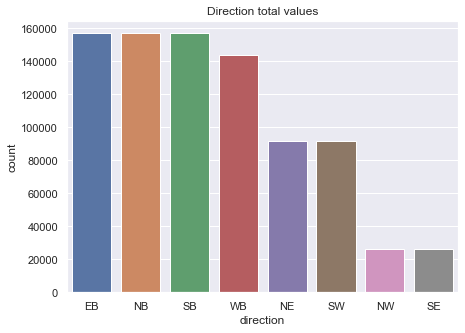

In [16]:
#direction countplot
sns.set(rc={'figure.figsize':(7,5)})
sns.countplot(train['direction'])
plt.title('Direction total values')

Text(0.5, 1.0, 'distribution of congestion values')

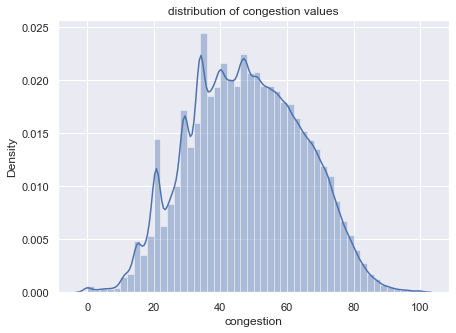

In [17]:
#distribution of congestion
sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(train['congestion'])
plt.title('distribution of congestion values')

Text(0.5, 1.0, 'congestion based on hour')

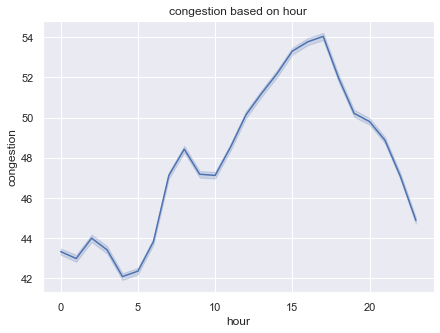

In [18]:
#congestion based on hour
sns.set(rc={'figure.figsize':(7,5)})
sns.lineplot(x='hour', y='congestion', data=train)
plt.title('congestion based on hour')

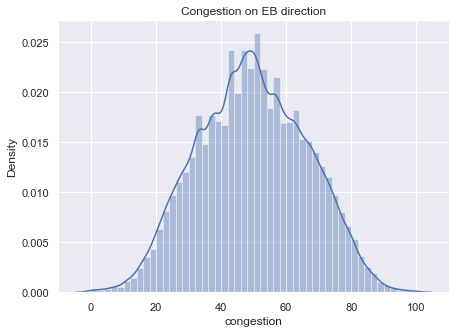

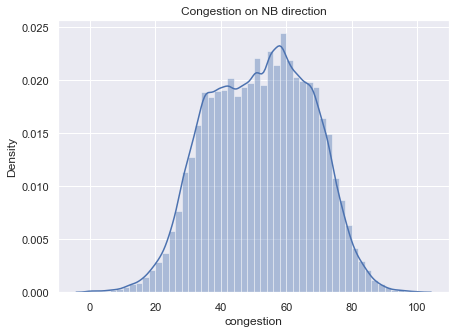

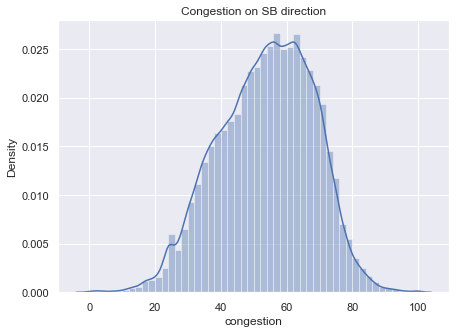

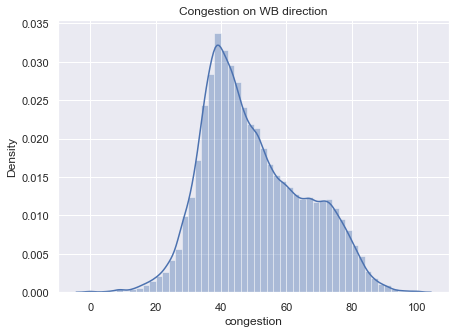

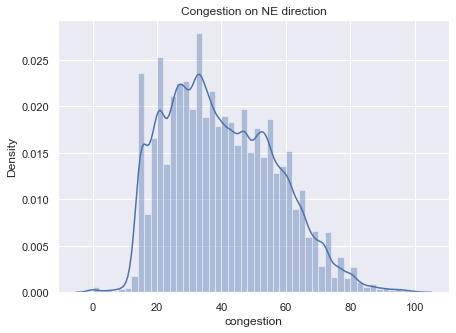

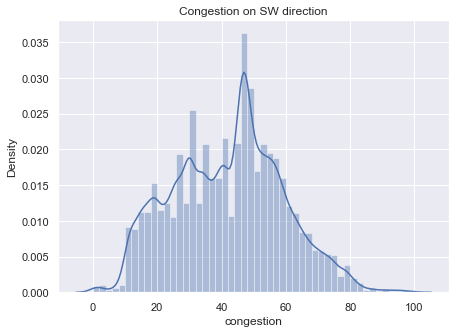

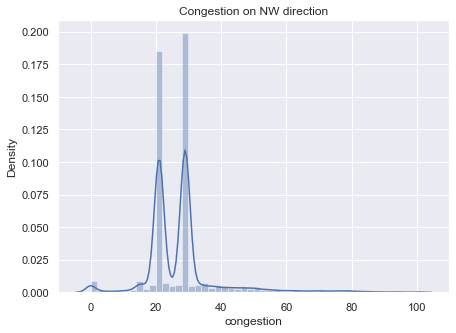

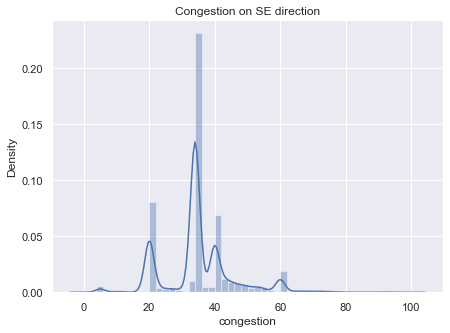

In [19]:
#congestion based on direction
for dir in ['EB', 'NB', 'SB', 'WB', 'NE', 'SW', 'NW', 'SE']:
    sns.distplot(train[train['direction']==dir]['congestion'])
    plt.title("Congestion on "+ dir +" direction")
    plt.show()

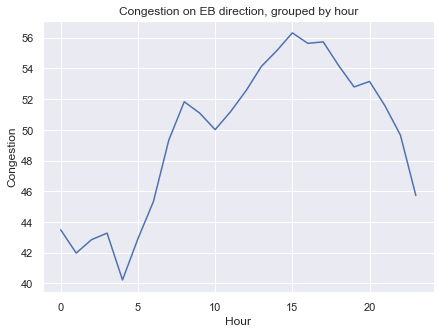

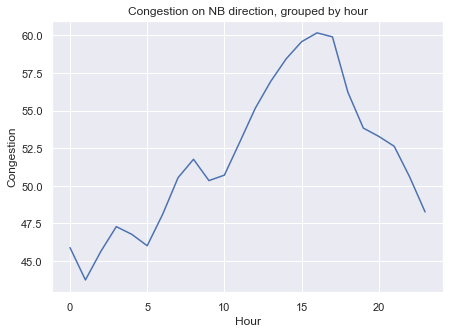

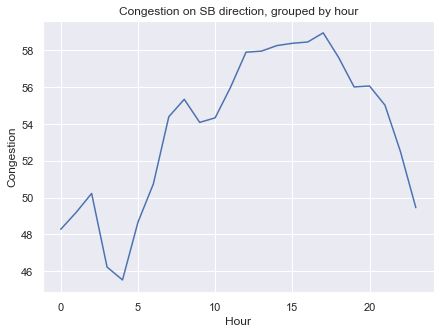

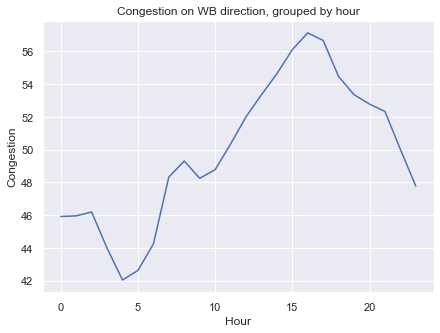

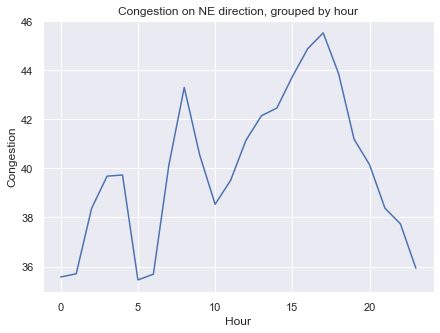

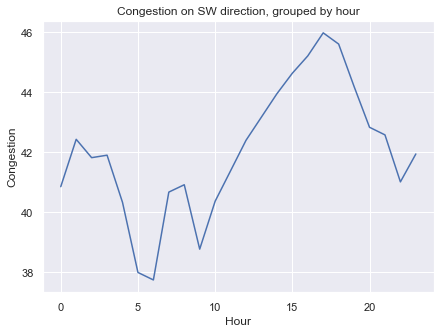

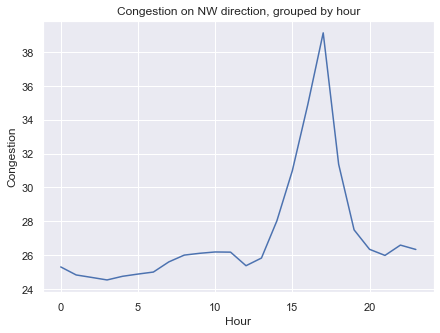

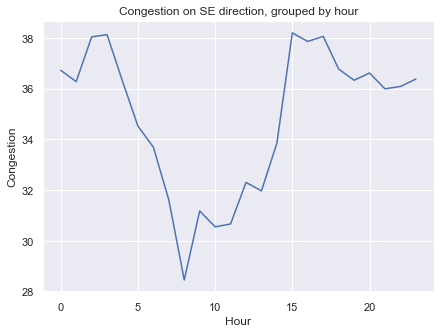

In [20]:
#congestion based on direction
for dir in ['EB', 'NB', 'SB', 'WB', 'NE', 'SW', 'NW', 'SE']:
    df = train[train['direction']==dir].groupby('hour')['congestion'].mean()
    df.plot()
    plt.xlabel('Hour')
    plt.ylabel('Congestion')
    plt.title("Congestion on "+ dir +" direction, grouped by hour")
    plt.show()

In [21]:
train['dayofweek'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

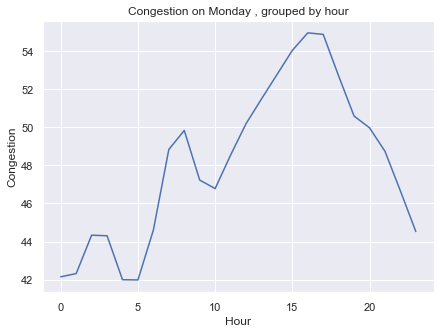

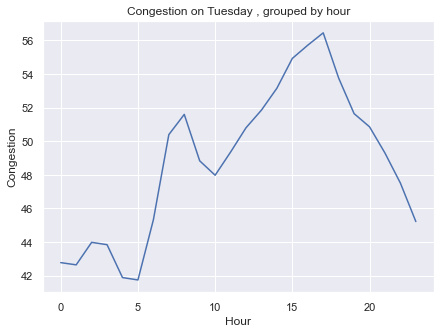

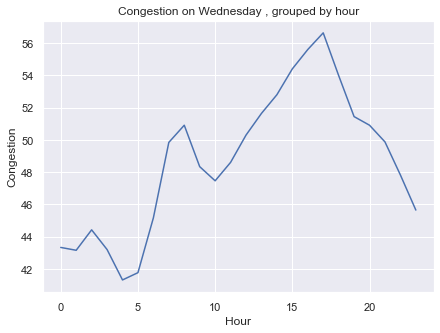

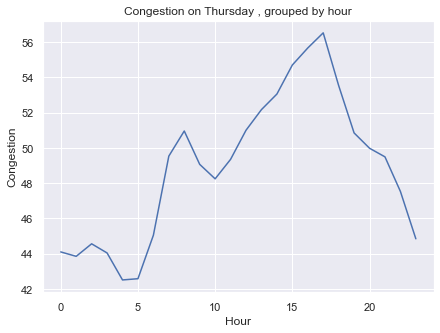

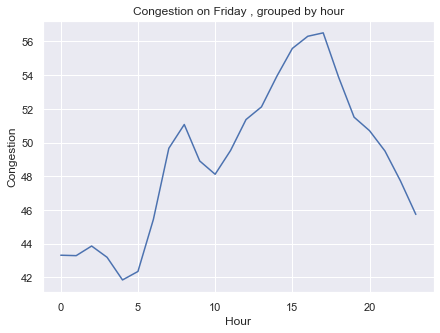

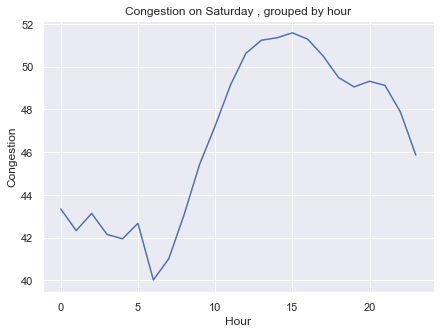

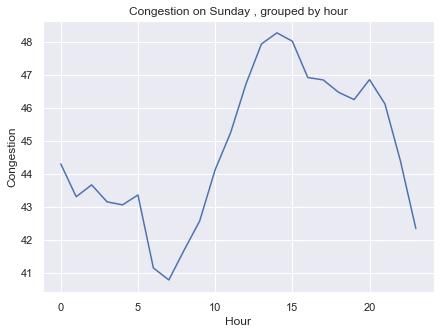

In [22]:
#congestion based on dayofweek
for dow in [0, 1, 2, 3, 4, 5, 6]:
    day = None
    
    if dow == 0:
        day = "Monday"
    elif dow == 1:
        day = "Tuesday"
    elif dow == 2:
        day = "Wednesday"
    elif dow == 3:
        day = "Thursday"
    elif dow == 4:
        day = "Friday"
    elif dow == 5:
        day = "Saturday"
    elif dow == 6:
        day = "Sunday"
        
    df = train[train['dayofweek']==dow].groupby('hour')['congestion'].mean()
    df.plot()
    plt.xlabel('Hour')
    plt.ylabel('Congestion')
    plt.title("Congestion on "+ day+" , grouped by hour")
    plt.show()

#### Model Build and Predicting Values

In [23]:
#Label Encoding for categorical features (train)
from sklearn.preprocessing import LabelEncoder

for i in train[train.dtypes[train.dtypes == "object"].index].columns:
    le = LabelEncoder() 
    le.fit(train[i]) 
    train[i] = le.transform(train[i])
    
for i in test[test.dtypes[test.dtypes == "object"].index].columns:
    le.fit(test[i])
    test[i] = le.transform(test[i])

In [24]:
print(train.dtypes)
print("-----------------------")
print(test.dtypes)

time                  datetime64[ns]
x                              int64
y                              int64
direction                      int32
congestion                     int64
hour                           int64
day                            int64
dayofweek                      int64
weekend                        int32
midnight                       int32
evening                        int32
x+y                            int32
x+y+direction                  int32
hour+direction                 int32
hour+x+y                       int32
hour+direction+x               int32
hour+direction+y               int32
hour+direction+x+y             int32
hour+x                         int32
hour+y                         int32
dtype: object
-----------------------
time                  datetime64[ns]
x                              int64
y                              int64
direction                      int32
hour                           int64
day                            int64


In [25]:
#splitting into train and validation data
from sklearn.model_selection import train_test_split

X = train.drop(columns=['congestion'], axis = 1)
y = train['congestion']

#using train_test_split
X_train , X_val , y_train , y_val = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [26]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [27]:
#using catboost as regressor
from catboost import CatBoostRegressor

In [28]:
#model fitting

MODEL_MAX_DEPTH = 12
MODEL_TASK_TYPE = 'GPU'
MODEL_RL = 0.035
MODEL_EVAL_METRIC ='MAE'
MODEL_LOSS_FUNCTION = 'MAE'
MODEL_ESR = 10
MODEL_VERBOSE = 100
MODEL_ITERATIONS = 30000

model = CatBoostRegressor(
    verbose=MODEL_VERBOSE,
    early_stopping_rounds=MODEL_ESR,
    max_depth=MODEL_MAX_DEPTH,
    task_type=MODEL_TASK_TYPE,
    learning_rate=MODEL_RL,
    iterations=MODEL_ITERATIONS,
    loss_function=MODEL_LOSS_FUNCTION,
    eval_metric= MODEL_EVAL_METRIC
)

model.fit(X_train, y_train)

0:	learn: 13.5769573	total: 42.6ms	remaining: 21m 17s
100:	learn: 6.9162012	total: 3.43s	remaining: 16m 54s
200:	learn: 6.6542028	total: 6.74s	remaining: 16m 39s
300:	learn: 6.4520798	total: 10.1s	remaining: 16m 41s
400:	learn: 6.3159080	total: 13.7s	remaining: 16m 47s
500:	learn: 6.2331966	total: 17.1s	remaining: 16m 46s
600:	learn: 6.1643826	total: 20.6s	remaining: 16m 48s
700:	learn: 6.1048371	total: 24.2s	remaining: 16m 52s
800:	learn: 6.0589789	total: 27.7s	remaining: 16m 50s
900:	learn: 6.0166220	total: 31.2s	remaining: 16m 49s
1000:	learn: 5.9786692	total: 34.8s	remaining: 16m 47s
1100:	learn: 5.9440460	total: 38.4s	remaining: 16m 47s
1200:	learn: 5.9123520	total: 41.9s	remaining: 16m 45s
1300:	learn: 5.8802232	total: 45.5s	remaining: 16m 43s
1400:	learn: 5.8526933	total: 49s	remaining: 16m 40s
1500:	learn: 5.8266062	total: 52.6s	remaining: 16m 38s
1600:	learn: 5.8016009	total: 56.2s	remaining: 16m 36s
1700:	learn: 5.7804186	total: 59.7s	remaining: 16m 33s
1800:	learn: 5.7592527

14700:	learn: 4.9263111	total: 9m 34s	remaining: 9m 57s
14800:	learn: 4.9239546	total: 9m 38s	remaining: 9m 53s
14900:	learn: 4.9212540	total: 9m 42s	remaining: 9m 49s
15000:	learn: 4.9188546	total: 9m 46s	remaining: 9m 45s
15100:	learn: 4.9163909	total: 9m 49s	remaining: 9m 42s
15200:	learn: 4.9144050	total: 9m 53s	remaining: 9m 38s
15300:	learn: 4.9120551	total: 9m 57s	remaining: 9m 34s
15400:	learn: 4.9097488	total: 10m 1s	remaining: 9m 30s
15500:	learn: 4.9077068	total: 10m 5s	remaining: 9m 26s
15600:	learn: 4.9056530	total: 10m 9s	remaining: 9m 22s
15700:	learn: 4.9032332	total: 10m 13s	remaining: 9m 18s
15800:	learn: 4.9008020	total: 10m 17s	remaining: 9m 15s
15900:	learn: 4.8985060	total: 10m 21s	remaining: 9m 11s
16000:	learn: 4.8966045	total: 10m 25s	remaining: 9m 7s
16100:	learn: 4.8943626	total: 10m 29s	remaining: 9m 3s
16200:	learn: 4.8922550	total: 10m 33s	remaining: 8m 59s
16300:	learn: 4.8900371	total: 10m 37s	remaining: 8m 55s
16400:	learn: 4.8879860	total: 10m 42s	rema

29300:	learn: 4.6966920	total: 19m 9s	remaining: 27.4s
29400:	learn: 4.6954699	total: 19m 13s	remaining: 23.5s
29500:	learn: 4.6942989	total: 19m 17s	remaining: 19.6s
29600:	learn: 4.6930957	total: 19m 21s	remaining: 15.7s
29700:	learn: 4.6919989	total: 19m 25s	remaining: 11.7s
29800:	learn: 4.6909551	total: 19m 29s	remaining: 7.81s
29900:	learn: 4.6896137	total: 19m 33s	remaining: 3.88s
29999:	learn: 4.6886854	total: 19m 36s	remaining: 0us


In [29]:
#model prediction for validation data
val_predict = model.predict(X_val)
val_predict

array([63.52910697, 29.20989029, 70.15567937, ..., 44.71285928,
       70.84330726, 40.47713199])

In [30]:
#checking score
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_val, np.round(val_predict,0)))

5.908594828683044


In [31]:
#predicting for test data
predict = model.predict(test)
predict

array([41.06257254, 29.07867667, 64.2349382 , ..., 73.54727369,
       20.90639152, 45.67130048])

In [32]:
predict = np.round(predict,0)
predict

array([41., 29., 64., ..., 74., 21., 46.])

#### Converting dataframe to csv files

In [33]:
tabular_mar_2022 = pd.DataFrame({'row_id':sample_sub.row_id, 'congestion': predict})
tabular_mar_2022

,row_id,congestion
0,848835,41.0
1,848836,29.0
2,848837,64.0
3,848838,22.0
4,848839,66.0
...,...,...
2335,851170,62.0
2336,851171,36.0
2337,851172,74.0
2338,851173,21.0


In [34]:
tabular_mar_2022.to_csv('tabular_mar_2022.csv',index=False)